In [1]:
def addAllantoinMetabolism(backup):
    model = backup.copy()
    ############
    # Nino-Gonzalez et al 2019
    # Chen et al 2006
    # Ritzel et al 2001
    # Takagi et al 2018
    met1 = Metabolite("S_ALLANTOIN_c",name="S-ALLANTOIN:(S)-(+)-allantoin",
                      formula="C4H6N4O3",compartment="c",
                      charge=0)
    amet1 = Metabolite("aS_ALLANTOIN_c",name="S-ALLANTOIN:(S)-(+)-allantoin",
                      formula="C4H5N4O3",compartment="c",
                      charge=-1)

    rxn1 = Reaction("Allantoin_tx",name="Allantoin uptake")
    rxn1.add_metabolites({model.metabolites.PROTON_e:-1,
                          model.metabolites.PROTON_c:1,met1:0.78,amet1:0.22})
    rxn1.gene_reaction_rule='Glyma.15G066400'
    rxn1.lower_bound = 0
    rxn1.upper_bound = 1000
    ##########
    met2 = Metabolite("S_ALLANTOIN_r",name="(S)-(+)-allantoin",
                      formula="C4H6N4O3",compartment="r",
                      charge=0)
    amet2 = Metabolite("aS_ALLANTOIN_r",name="(S)-(+)-allantoin",
                      formula="C4H5N4O3",compartment="r",
                      charge=-1)


    proton_R = model.metabolites.PROTON_c.copy()
    proton_R.id = "PROTON_r"
    proton_R.compartment = "r"
    rxnProton = Reaction("PROTON_rc",name="ER proton exchange")
    rxnProton.add_metabolites({proton_R:-1,model.metabolites.PROTON_c:1})
    rxnProton.lower_bound = -1000
    rxnProton.upper_bound = 1000

    rxn2 = Reaction("Allantoin_rc",name="Allantoin peroxisome uptake/efflux")
    rxn2.add_metabolites({met1:-0.78,amet1:-0.22,proton_R:-0.12,met2:0.9,amet2:0.1})
    rxn2.lower_bound = -1000
    rxn2.upper_bound = 1000
    ###########
    met3 = Metabolite("ALLANTOATE_r",name="allantoate",
                      formula="C4H7N4O4",compartment="r",
                      charge=-1)

    water_R = model.metabolites.WATER_c.copy()
    water_R.id = "WATER_r"
    water_R.compartment = "r"
    rxnWater = Reaction("H2O_rc",name="ER water exchange")
    rxnWater.add_metabolites({water_R:-1,model.metabolites.WATER_c:1})
    rxnWater.lower_bound = -1000
    rxnWater.upper_bound = 1000


    rxn3 = Reaction("ALLANTOINASE_RXN_r",name="ALLANTOINASE-RXN")
    rxn3.add_metabolites({met2:-0.9,amet2:-0.1,water_R:-1,
                          met3:1,proton_R:0.9})
    rxn3.gene_reaction_rule='Glyma.15G073000 or Glyma.15G072900 or Glyma.13G240500 or Glyma.13G240600'
    #Glyma.15G073000 - cytoplasmic in Uniprot
    #Glyma.15G072900 - cytoplasmic in Uniprot
    #Glyma.13G240500 - cytoplasmic in Uniprot
    #Glyma.13G240600 - cytoplasmic in Uniprot
    #But according to Takagi et al 2018 ER

    rxn3.lower_bound = 0
    rxn3.upper_bound = 1000
    ############
    met4 = Metabolite("CPD0_2298_r",name="CPD0-2298:(S)-ureidoglycine",
                      formula="C3H7N3O3",compartment="r",
                      charge=0)
    amet4 = Metabolite("aCPD0_2298_r",name="CPD0-2298:(S)-ureidoglycine",
                      formula="C3H6N3O3",compartment="r",
                      charge=-1)

    met5 = model.metabolites.AMMONIUM_c.copy()
    met5.id = "AMMONIUM_r"
    met5.compartment = "r"
    rxnNH4 = Reaction("NH4_rc",name="Ammonium ER exchange")
    rxnNH4.add_metabolites({met5:-1,model.metabolites.AMMONIUM_c:1})
    rxnNH4.lower_bound = -1000
    rxnNH4.upper_bound = 1000

    co2_R = model.metabolites.CARBON_DIOXIDE_c.copy()
    co2_R.id = "CARBON_DIOXIDE_r"
    co2_R.compartment = "r"
    rxnCO2 = Reaction("CO2_rc",name="CO2 ER exchange")
    rxnCO2.add_metabolites({co2_R:-1,model.metabolites.CARBON_DIOXIDE_c:1})
    rxnCO2.lower_bound = -1000
    rxnCO2.upper_bound = 1000

    rxn4 = Reaction("ALLANTOATE_DEIMINASE_RXN_r",name="ALLANTOATE-DEIMINASE-RXN:allantoate deiminase")
    rxn4.gene_reaction_rule='Glyma.15G156900 or Glyma.09G050800'
    rxn4.add_metabolites({met3:-1,proton_R:-1.72,water_R:-1,
                          met4:0.72,amet4:0.28,met5:1,co2_R:1})
    #Glyma.15G156900 -ER in Uniprot
    #Glyma.09G050800 -ER in Uniprot
    rxn4.lower_bound = 0
    rxn4.upper_bound = 1000
    #############
    met6 = Metabolite("CPD_1091_r",name="CPD-1091:(S)-ureidoglycolate",
                      formula="C3H5N2O4",compartment="r",
                      charge=-1)

    water_R = model.metabolites.WATER_c.copy()
    water_R.id = "WATER_r"
    water_R.compartment = "r"
    rxnWATER = Reaction("H2O_rc",name="H2O ER exchange")
    rxnWATER.add_metabolites({water_R:-1,model.metabolites.WATER_c:1})
    rxnWATER.lower_bound = -1000
    rxnWATER.upper_bound = 1000

    rxn5 = Reaction("URUR_RXN_r",name="URUR-RXN:(S)-ureidoglycine aminohydrolase")
    rxn5.gene_reaction_rule='Glyma.17G148400 or Glyma.05G066500'
    #Glyma.17G148400
    #Glyma.05G066500
    rxn5.add_metabolites({met4:-0.72,amet4:-0.28,proton_R:-0.28,water_R:-1,
                          met6:1,met5:1})
    rxn5.lower_bound = 0
    rxn5.upper_bound = 1000
    #############
    # met7 = model.metabolites.UREA_c.copy()
    # met7.id = "UREA_r"
    # met7.compartment="r"

    # rxn6 = Reaction("ALLANTOICASE_RXN_r",name="ALLANTOICASE-RXN:allantoicase")
    # rxn6.add_metabolites({met3:-1,model.metabolites.WATER_r:-1,
    #                       met6:1,met7:1})
    # rxn6.lower_bound = 0
    # rxn6.lower_bound = 1000
    #############

    glyox_R = model.metabolites.GLYOX_x.copy()
    glyox_R.id = "GLYOX_r"
    glyox_R.compartment = "r"
    rxnGlyox = Reaction("glyox_rx",name="glyoxylate ER-peroxisome exchange")
    rxnGlyox.add_metabolites({glyox_R:-1,model.metabolites.GLYOX_x:1})

    rxn7 = Reaction("UREIDOGLYCOLATE_HYDROLASE_RXN_r",name="UREIDOGLYCOLATE-HYDROLASE-RXN:ureidoglycolate amidohydrolase")
    rxn7.gene_reaction_rule='Glyma.20G205500 or Glyma.10G184900'
    #Glyma.20G205500 - ER in Uniprot
    #Glyma.10G184900 - ER in Uniprot
    rxn7.add_metabolites({met6:-1,proton_R:-2,water_R:-1,
                          met5:2,co2_R:1,glyox_R:1})
    rxn7.lower_bound = 0
    rxn7.upper_bound = 1000
    #############
    # rxn8 = Reaction("UREIDOGLYCOLATE_LYASE_RXN_r",name="UREIDOGLYCOLATE-LYASE-RXN:ureidoglycolate lyase")
    # rxn8.add_metabolites({met6:-1,
    #                       met7:1,model.metabolites.GLYOX_r:1})
    # rxn8.lower_bound = 0
    # rxn8.lower_bound = 1000
    ############
    model.add_reactions([rxn1,rxn2,rxn3,rxn4,rxn5,rxn7,
                         rxnCO2,rxnGlyox,rxnNH4,rxnProton,rxnWater])
    return model



from cobra import io,flux_analysis
from cobra.core import Reaction, Metabolite

#import model. Update file name and location in the next line
cobra_model = io.sbml.read_sbml_model("./../Data/Soy_core_model_GA.sbml")
#cobra_model.solver="glpk"
cobra_model = addAllantoinMetabolism(cobra_model)

#Remove all metabolites except sucrose from Phloem
rxn = cobra_model.reactions.get_by_id("Phloem_output_tx")
mets2remove = list()

#for met in rxn.metabolites.keys():
    #if "SUCROSE" in met.id:# or "GLC" in met.id or "FRU" in met.id:
    #    continue
    #else:
    #    mets2remove.append(met)
#    mets2remove.append(met)

#remove_metabolite_from_reaction(rxn,mets2remove)
#rxn.add_metabolites({cobra_model.metabolites.get_by_id("sSUCROSE_b"):-1})
#rxn.add_metabolites({cobra_model.metabolites.get_by_id("GAP_c"):-1})
#coeff = sum(rxn.metabolites.values())
#rxn.add_metabolites({cobra_model.metabolites.get_by_id("PROTON_c"):-1*coeff,cobra_model.metabolites.get_by_id("PROTON_e"):coeff})

#no external sucrose or glucose
cobra_model.reactions.get_by_id("Sucrose_tx").lower_bound = 0
cobra_model.reactions.get_by_id("Sucrose_tx").upper_bound = 0
cobra_model.reactions.get_by_id("GLC_tx").lower_bound = 0
cobra_model.reactions.get_by_id("GLC_tx").upper_bound = 0
cobra_model.reactions.get_by_id("NH4_tx").lower_bound = 0
cobra_model.reactions.get_by_id("NH4_tx").upper_bound = 0
cobra_model.reactions.get_by_id("Nitrate_tx").lower_bound = 0
cobra_model.reactions.get_by_id("Nitrate_tx").upper_bound = 0

#no external light energy
cobra_model.reactions.get_by_id("Photon_tx").lower_bound = 0
cobra_model.reactions.get_by_id("Photon_tx").upper_bound = 0

#set export of sugars as objective
cobra_model.reactions.get_by_id("Phloem_output_tx").objective_coefficient=1

#add source reaction for TP
rxn = Reaction("GAP_tx",name = "TP source")
rxn.add_metabolites({cobra_model.metabolites.get_by_id("GAP_c"):1})
rxn.upper_bound = 1000
rxn.lower_bound = 0
cobra_model.add_reaction(rxn)

rxn = Reaction("G3P_tx",name = "PGA source")
rxn.add_metabolites({cobra_model.metabolites.get_by_id("G3P_c"):1})
rxn.upper_bound = 1000
rxn.lower_bound = 0
cobra_model.add_reaction(rxn)

#add source reaction for TP
rxn = Reaction("GLYCOLATE_tx",name = "Glycolate source")
rxn.add_metabolites({cobra_model.metabolites.get_by_id("GLYCOLLATE_c"):1})
rxn.upper_bound = 1000
rxn.lower_bound = 0
cobra_model.add_reaction(rxn)

#add source reaction for TP
rxn = Reaction("GLYCERATE_tx",name = "Glycerate sink")
rxn.add_metabolites({cobra_model.metabolites.get_by_id("GLYCERATE_c"):-1})
rxn.upper_bound = 1000
rxn.lower_bound = 0
cobra_model.add_reaction(rxn)

#remove mGS and cGS
cobra_model.reactions.get_by_id("GLUTAMINESYN_RXN_m").lower_bound = 0
cobra_model.reactions.get_by_id("GLUTAMINESYN_RXN_m").upper_bound = 0
cobra_model.reactions.get_by_id("GLUTAMINESYN_RXN_c").lower_bound = 0
cobra_model.reactions.get_by_id("GLUTAMINESYN_RXN_c").upper_bound = 0

#remove glutamine synthetase and glutamate synthase
#rxn = cobra_model.reactions.get_by_id("GLUTAMATE_SYNTHASE_FERREDOXIN_RXN_p")
#mets2remove=[cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"),cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p")]
#remove_metabolite_from_reaction(rxn,mets2remove)
#rxn = cobra_model.reactions.get_by_id("GLUTAMINESYN_RXN_p")
#mets2remove=[cobra_model.metabolites.get_by_id("ATP_p"),cobra_model.metabolites.get_by_id("aATP_p")]
#remove_metabolite_from_reaction(rxn,mets2remove)

#rxn = Reaction("NrefixationCostbypass")
#rxn.add_metabolites({cobra_model.metabolites.get_by_id("GLT_x"):1,cobra_model.metabolites.get_by_id("2_KETOGLUTARATE_x"):-1,cobra_model.metabolites.get_by_id("AMMONIUM_m"):-1})
#rxn.lower_bound = 0
#rxn.upper_bound = 1000
#cobra_model.add_reaction(rxn)

#provide energy for N fixation
#rxn = Reaction("NrefixationEnergy")
#rxn.add_metabolites({cobra_model.metabolites.get_by_id("ATP_p"):0.9,cobra_model.metabolites.get_by_id("aATP_p"):0.1,cobra_model.metabolites.get_by_id("ADP_p"):-0.8,cobra_model.metabolites.get_by_id("aADP_p"):-0.2,cobra_model.metabolites.get_by_id("Pi_p"):-1,cobra_model.metabolites.get_by_id("Reduced_ferredoxins_p"):2,cobra_model.metabolites.get_by_id("Oxidized_ferredoxins_p"):-2})
#rxn.lower_bound = 0
#rxn.upper_bound = 1000
#met = Metabolite("NrefixEnergyConstraint")
#rxn.add_metabolites({met:1})
#cobra_model.add_reaction(rxn)
#cobra_model.reactions.get_by_id("GCVMULTI_RXN_m").add_metabolites({met:-1})

#turn off phosphoserine transaminase
#cobra_model.reactions.get_by_id("PSERTRANSAM_RXN_p").lower_bound = 0
#cobra_model.reactions.get_by_id("PSERTRANSAM_RXN_p").upper_bound = 0


cobra_model.reactions.get_by_id("Pi_ec").lower_bound = -1000
cobra_model.reactions.get_by_id("Pi_ec").upper_bound = 1000

#add malate and citrate accumulation reactions
rxn = Reaction("MAL_v_accumulation")
rxn.add_metabolites({cobra_model.metabolites.MAL_v:-0.7,cobra_model.metabolites.aMAL_v:-0.3})
rxn.lower_bound = -1000
rxn.upper_bound = 1000
cobra_model.add_reaction(rxn)
rxn = Reaction("CIT_v_accumulation")
rxn.add_metabolites({cobra_model.metabolites.CIT_v:-0.5,cobra_model.metabolites.aCIT_v:-0.5})
rxn.lower_bound = -1000
rxn.upper_bound = 1000
cobra_model.add_reaction(rxn)


temp = cobra_model.copy()


PPFD = 1000
#constrain maintenace
ATPase = (0.0049*PPFD) + 2.7851
ATPase = round(ATPase,3)
temp.reactions.get_by_id("ATPase_tx").lower_bound = ATPase
temp.reactions.get_by_id("ATPase_tx").upper_bound = ATPase
temp.reactions.get_by_id("NADPHoxc_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxc_tx").upper_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxp_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxp_tx").upper_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxm_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxm_tx").upper_bound = ATPase/9

#temp.reactions.get_by_id("NrefixationCostbypass").lower_bound = df270["Vt_glycolate"][i]
#temp.reactions.get_by_id("NrefixationCostbypass").upper_bound = df270["Vt_glycolate"][i]
#temp.reactions.get_by_id("NrefixationEnergy").lower_bound = df270["Vt_glycerate"][i]
#temp.reactions.get_by_id("NrefixationEnergy").upper_bound = df270["Vt_glycerate"][i]

#constraint TP flux
temp.reactions.get_by_id("GAP_tx").lower_bound = 0#5.0201
temp.reactions.get_by_id("GAP_tx").upper_bound = 0#5.0201
temp.reactions.get_by_id("G3P_tx").lower_bound = 0#0.010483
temp.reactions.get_by_id("G3P_tx").upper_bound = 0#0.010483

#constraint glycollate and glycerate fluxes flux
temp.reactions.get_by_id("GLYCOLATE_tx").lower_bound = 0#9.3435
temp.reactions.get_by_id("GLYCOLATE_tx").upper_bound = 0#9.3435
temp.reactions.get_by_id("GLYCERATE_tx").lower_bound = 0#4.6718
temp.reactions.get_by_id("GLYCERATE_tx").upper_bound = 0#4.6718

#temp.reactions.get_by_id("NrefixationCostbypass").lower_bound = df270["Vt_glycolate"][i]
#temp.reactions.get_by_id("NrefixationCostbypass").upper_bound = df270["Vt_glycolate"][i]
#temp.reactions.get_by_id("NrefixationEnergy").lower_bound = df270["Vt_glycerate"][i]
#temp.reactions.get_by_id("NrefixationEnergy").upper_bound = df270["Vt_glycerate"][i]

temp.reactions.get_by_id("MAL_v_accumulation").lower_bound = 0#0.71*1.3202
temp.reactions.get_by_id("MAL_v_accumulation").upper_bound = 0#0.71*1.3202

temp.reactions.get_by_id("CIT_v_accumulation").lower_bound = 0#-0.56*1.3202
temp.reactions.get_by_id("CIT_v_accumulation").upper_bound = 0#-0.56*1.3202



for rxn in cobra_model.reactions:
    if rxn.lower_bound == -1000:
        rxn.lower_boudn = -3000
    if rxn.upper_bound == 1000:
        rxn.upper_bound = 3000


JATPase = 0
rxn = Reaction("ATP_source_from_ODE")
rxn.add_metabolites({temp.metabolites.get_by_id("ADP_p"):-0.8,
                     temp.metabolites.get_by_id("aADP_p"):-0.2,
                     temp.metabolites.get_by_id("Pi_p"):-1,
                     temp.metabolites.get_by_id("PROTON_p"):-0.9,
                     temp.metabolites.get_by_id("ATP_p"):0.9,
                     temp.metabolites.get_by_id("aATP_p"):0.1,
                     temp.metabolites.get_by_id("WATER_p"):1})
rxn.lower_bound = JATPase
rxn.upper_bound = JATPase
temp.add_reaction(rxn)

#ADD NADPH source reaction in FBA to represent NADPH from ODE
JNADPHox = 0
rxn = Reaction("NADPH_source_from_ODE")
rxn.add_metabolites({temp.metabolites.get_by_id("NADP_p"):-1,
                     temp.metabolites.get_by_id("WATER_p"):-1,
                     temp.metabolites.get_by_id("NADPH_p"):1,
                     temp.metabolites.get_by_id("OXYGEN_MOLECULE_p"):1,
                     temp.metabolites.get_by_id("PROTON_p"):1})
rxn.lower_bound = JNADPHox
rxn.upper_bound = JNADPHox
temp.add_reaction(rxn)

#check if model works
temp.solver="glpk"


fluxDict = dict()
fin = open("./../Analaysis/Daytime_flux_MATURELEAF_PPFD600_CO2400.csv")
for line in fin:
    lineparts = line.replace("/n","").split(",")
    fluxDict[lineparts[0]]=float(lineparts[2])

for rxn in ["ATPase_tx","NADPHoxc_tx","NADPHoxp_tx","NADPHoxm_tx","GAP_tx","G3P_tx","GLYCOLATE_tx",
            "GLYCERATE_tx","MAL_v_accumulation","CIT_v_accumulation","ATP_source_from_ODE","NADPH_source_from_ODE"]:
    rxn = temp.reactions.get_by_id(rxn)
    rxn.lower_bound = fluxDict[rxn.id]
    rxn.upper_bound = fluxDict[rxn.id]


from cobra.flux_analysis.parsimonious import pfba
sol = pfba(temp)
#sol = temp.optimize()

# sol.fluxes = dict()
# fin = open("./../Analaysis/Daytime_flux_MATURELEAF_PPFD1000_CO2800.csv")
# for line in fin:
#     lineparts = line.replace("/n","").split(",")
#     sol.fluxes[lineparts[0]]=float(lineparts[2])

#sol = custom_pFBA(temp)
rxn =  temp.reactions.get_by_id("Phloem_output_tx")
met = temp.metabolites.sSUCROSE_b
print("Sucrose export rate ="+str(rxn.metabolites[met]*sol.fluxes[rxn.id]))

total = JATPase
for rxn in temp.metabolites.ATP_p.reactions:
    if round(sol.fluxes[rxn.id],3) != 0:
        coeff1 = rxn.metabolites[temp.metabolites.ATP_p]
        coeff2 = rxn.metabolites[temp.metabolites.aATP_p]
        ATPflux = sol.fluxes[rxn.id]*(coeff1+coeff2)
        #print(rxn.id+"\t"+str(ATPflux)+"="+str(total))
        if rxn.id == "ATP_ADP_Pi_pc":
            total = total + ATPflux
            #print(ATPflux)
print("Extra APTase flux ="+str(total))

total = JNADPHox
for rxn in temp.metabolites.NADPH_p.reactions:
    if round(sol.fluxes[rxn.id],3) != 0:
        coeff1 = rxn.metabolites[temp.metabolites.NADPH_p]
        NADPHflux = sol.fluxes[rxn.id]*(coeff1)
        print(rxn.id+"\t"+str(NADPHflux)+"="+str(total))
        if rxn.id == "MALATE_DEH_RXN_p":
            total = total + NADPHflux
            print(NADPHflux)
for rxn in temp.metabolites.NADH_p.reactions:
    if round(sol.fluxes[rxn.id],3) != 0:
        coeff1 = rxn.metabolites[temp.metabolites.NADH_p]
        NADPHflux = sol.fluxes[rxn.id]*(coeff1)
        print(rxn.id+"\t"+str(NADPHflux)+"="+str(total))
        if rxn.id == "MALATE_DEH_RXN_p":
            total = total + NADPHflux
            print(NADPHflux)
print("Extra NADPH flux ="+str(total))



C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '0+unknown' currently installed).
  warnings.warn(msg, UserWarning)


Academic license - for non-commercial use only - expires 2021-08-06
Using license file C:\Users\sanus\gurobi.lic
Read LP format model from file C:\Users\sanus\AppData\Local\Temp\tmp4pw2dt3b.lp
Reading time = 0.02 seconds
: 862 rows, 1784 columns, 8920 nonzeros
Read LP format model from file C:\Users\sanus\AppData\Local\Temp\tmphalb4oo1.lp
Reading time = 0.02 seconds
: 875 rows, 1818 columns, 9022 nonzeros
Sucrose export rate =-1.1113257873202333
Extra APTase flux =0
GLUTATHIONE_REDUCT_NADPH_RXN_p	-0.0012700864974159456=0
ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p	-0.017094679312619692=0
NADPH_source_from_ODE	4.489=0
ACETOOHBUTREDUCTOISOM_RXN_p	-0.00264315328857025=0
MALATE_DEHYDROGENASE_NADP_RXN_p	-0.0006350432487072719=0
N_ACETYLGLUTPREDUCT_RXN_p	-0.0006350432487079729=0
ACETOLACTREDUCTOISOM_RXN_p	-0.007328742926539373=0
NADPHoxp_tx	-0.6366666666666667=0
SHIKIMATE_5_DEHYDROGENASE_RXN_p	-0.009920406144080917=0
HOMOSERDEHYDROG_RXN_NADP_p	-0.013730666091371612=0
DIHYDROPICRED_RXN_NADP_p	

In [2]:
sol = temp.optimize()


In [7]:
sol.status

'optimal'

In [2]:
from cobra.flux_analysis.variability import flux_variability_analysis as fva
fva_result = fva(temp,pfba_factor=1,fraction_of_optimum=1)

In [39]:
met = temp.metabolites.get_by_id("NADPH_p")
scale = 1
for rxn in met.reactions:
    if round(sol.fluxes[rxn.id],3)!=0 and \
       (round(fva_result.loc[rxn.id,:]["maximum"],3)!=0 or round(fva_result.loc[rxn.id,:]["minimum"],3)!=0):
        print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*rxn.metabolites[met]/scale))
        print(rxn.reaction)
        print(fva_result.loc[rxn.id,:])
        print("---------")

DIHYDROPICRED_RXN_NADP_p	-0.0033640132212480784
2_3_DIHYDRODIPICOLINATE_p + NADPH_p + PROTON_p --> DELTA1_PIPERIDEINE_2_6_DICARBOXYLATE_p + NADP_p
minimum    0.003364
maximum    0.003364
Name: DIHYDROPICRED_RXN_NADP_p, dtype: float64
---------
1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p	-3.795711499354072
NADP_p + PROTON_p + 2.0 Reduced_ferredoxins_p <=> NADPH_p + 2.0 Oxidized_ferredoxins_p
minimum   -3.795711
maximum   -3.795711
Name: 1_PERIOD_18_PERIOD_1_PERIOD_2_RXN_p, dtype: float64
---------
GLUTATHIONE_REDUCT_NADPH_RXN_p	-0.0012700864974159456
NADPH_p + 0.91 OXIDIZED_GLUTATHIONE_p + 1.09 PROTON_p + 0.09 bOXIDIZED_GLUTATHIONE_p --> 2.0 GLUTATHIONE_p + NADP_p
minimum    0.00127
maximum    0.00127
Name: GLUTATHIONE_REDUCT_NADPH_RXN_p, dtype: float64
---------
ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE_RXN_p	-0.017094679312619692
L_BETA_ASPARTYL_P_p + NADPH_p + PROTON_p --> L_ASPARTATE_SEMIALDEHYDE_p + NADP_p + Pi_p
minimum    0.017095
maximum    0.017095
Name: ASPARTATE_SEMIALDEHYDE_DEHYDROGENASE

In [35]:
-0.6442642695345273-3.7919012398618244

-4.436165509396352

In [38]:
met=temp.metabolites.get_by_id("ATP_p")
met2 = temp.metabolites.get_by_id("aATP_p")
for rxn in met.reactions:
    if round(sol.fluxes[rxn.id],3)!=0 and \
       (round(fva_result.loc[rxn.id,:]["maximum"],3)!=0 or round(fva_result.loc[rxn.id,:]["minimum"],3)!=0):
        print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*(rxn.metabolites[met]+
                                        rxn.metabolites[met2])))
        print(rxn.reaction)
        print(fva_result.loc[rxn.id,:])
        print("--------------")

HOMOSERKIN_RXN_p	-0.013730666091371612
0.9 ATP_p + HOMO_SER_p + 0.1 aATP_p --> 0.8 ADP_p + O_PHOSPHO_L_HOMOSERINE_p + 0.9 PROTON_p + 0.2 aADP_p
minimum    0.013731
maximum    0.013731
Name: HOMOSERKIN_RXN_p, dtype: float64
--------------
SHIKIMATE_KINASE_RXN_p	-0.009920406144080917
0.9 ATP_p + SHIKIMATE_p + 0.1 aATP_p --> 0.8 ADP_p + 0.9 PROTON_p + SHIKIMATE_5P_p + 0.2 aADP_p
minimum    0.00992
maximum    0.00992
Name: SHIKIMATE_KINASE_RXN_p, dtype: float64
--------------
ATPPHOSPHORIBOSYLTRANS_RXN_p	-0.0006350432487079729
0.9 ATP_p + 0.8 PRPP_p + 0.1 aATP_p + 0.2 aPRPP_p --> PHOSPHORIBOSYL_ATP_p + 0.55 PPI_p + 0.75 PROTON_p + 0.45 bPPI_p
minimum    0.000635
maximum    0.000635
Name: ATPPHOSPHORIBOSYLTRANS_RXN_p, dtype: float64
--------------
SULFATE_ADENYLYLTRANS_RXN_p	-0.0012700864974159456
0.9 ATP_p + 0.45 PROTON_p + SULFATE_p + 0.1 aATP_p --> APS_p + 0.55 PPI_p + 0.45 bPPI_p
minimum    0.00127
maximum    0.00127
Name: SULFATE_ADENYLYLTRANS_RXN_p, dtype: float64
--------------
PRPPS

In [66]:
-0.25054048967753806-0.3868293256058871

-0.6373698152834252

In [40]:
met = temp.metabolites.get_by_id("PHOSPHO_ENOL_PYRUVATE_c")
scale = 1
for rxn in met.reactions:
    if round(sol.fluxes[rxn.id],3)!=0:
        print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*rxn.metabolites[met]/scale))
        print(rxn.reaction)
        print(fva_result.loc[rxn.id,:])
        print("---------")

PEPDEPHOS_RXN_c	-0.2576324074453749
0.5 ADP_c + PHOSPHO_ENOL_PYRUVATE_c + 0.85 PROTON_c + 0.5 aADP_c --> 0.65 ATP_c + PYRUVATE_c + 0.35 aATP_c
minimum    0.254745
maximum    0.257632
Name: PEPDEPHOS_RXN_c, dtype: float64
---------
PEPCARBOX_RXN_c	-0.4573572552833143
HCO3_c + PHOSPHO_ENOL_PYRUVATE_c + 0.3 PROTON_c --> OXALACETIC_ACID_c + 0.7 Pi_c + 0.3 aPi_c
minimum    0.457357
maximum    0.457357
Name: PEPCARBOX_RXN_c, dtype: float64
---------
2PGADEHYDRAT_RXN_c	0.7149896627286892
2_PG_c <=> PHOSPHO_ENOL_PYRUVATE_c + WATER_c
minimum    0.712102
maximum    0.737089
Name: 2PGADEHYDRAT_RXN_c, dtype: float64
---------


In [9]:
-2.9780430715858026*2

-5.956086143171605

In [11]:
met=temp.metabolites.get_by_id("ATP_c")
met2 = temp.metabolites.get_by_id("aATP_c")
for rxn in met.reactions:
    if round(sol.fluxes[rxn.id],3)!=0:
        print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*(rxn.metabolites[met]+
                                        rxn.metabolites[met2])))
        print(rxn.reaction)
        print("--------------")

ATP_AMP_mc	0.004279961924009492
AMP_c + 0.9 ATP_m + 0.35 PROTON_c + 0.1 aATP_m <=> AMP_m + 0.65 ATP_c + 0.1 PROTON_m + 0.35 aATP_c
--------------
ATPase_tx	-7.69
0.65 ATP_c + WATER_c + 0.35 aATP_c --> 0.5 ADP_c + 0.55 PROTON_c + 0.7 Pi_c + 0.5 aADP_c + 0.3 aPi_c
--------------
PEPDEPHOS_RXN_c	0.2576324074455797
0.5 ADP_c + PHOSPHO_ENOL_PYRUVATE_c + 0.85 PROTON_c + 0.5 aADP_c --> 0.65 ATP_c + PYRUVATE_c + 0.35 aATP_c
--------------
UDPKIN_RXN_c	-1.46542179072671
0.65 ATP_c + 0.15 PROTON_c + 0.5 UDP_c + 0.35 aATP_c + 0.5 aUDP_c <=> 0.5 ADP_c + 0.5 UTP_c + 0.5 aADP_c + 0.5 aUTP_c
--------------
GLUTKIN_RXN_c	-0.0007650173019512234
0.65 ATP_c + GLT_c + 0.35 aATP_c --> 0.5 ADP_c + 0.91 L_GLUTAMATE_5_P_c + 0.76 PROTON_c + 0.5 aADP_c + 0.09 aL_GLUTAMATE_5_P_c
--------------
ATP_ADP_mc	8.902207210631698
0.5 ADP_c + 0.9 ATP_m + 0.1 PROTON_m + 0.5 aADP_c + 0.1 aATP_m <=> 0.8 ADP_m + 0.65 ATP_c + 0.15 PROTON_c + 0.2 aADP_m + 0.35 aATP_c
--------------
ASNSYNA_RXN_c	-0.0027499273201070447
AMMONIUM

In [6]:
tot = 0
rxn = temp.reactions.Phloem_output_tx
for met in rxn.metabolites.keys():
    if "PROTON" in met.id or "SUCROSE" in met.id or "GLC" in met.id or "FRU" in met.id:
        continue
    tot = tot+(rxn.metabolites[met])
print(tot)
print(sol.fluxes[rxn.id]*tot)

-0.07920792050000001
-0.10284462456627258


In [7]:
2.175878398455006+2.175878398455006

4.351756796910012

In [8]:
met = temp.metabolites.get_by_id("GAP_c")
scale = 3
for rxn in met.reactions:
    if round(rxn.flux,3)!=0:
        print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*rxn.metabolites[met]*met.elements["C"]/scale))
        print(rxn.reaction)

TRIOSEPISOMERIZATION_RXN_c	-2.1885427300133617
GAP_c <=> DIHYDROXY_ACETONE_PHOSPHATE_c
GAP_3PGA_pc	-0.6435145399732782
G3P_c + GAP_p <=> G3P_p + GAP_c
GAP_tx	5.0206
 --> GAP_c
GAPOXNPHOSPHN_RXN_c	-0.0
GAP_c + NAD_c + 0.7 Pi_c + 0.3 aPi_c <=> DPG_c + NADH_c + 1.3 PROTON_c
F16ALDOLASE_RXN_c	-2.1885427300133617
FRUCTOSE_16_DIPHOSPHATE_c <=> DIHYDROXY_ACETONE_PHOSPHATE_c + GAP_c


In [9]:
2.175878398455006*2

4.351756796910012

In [10]:
tot = 0
rxn = temp.reactions.Phloem_output_tx
for met in rxn.metabolites.keys():
    if "PROTON" in met.id or "SUCROSE" in met.id or "GLC" in met.id or "FRU" in met.id:
        continue
    tot = tot+(rxn.metabolites[met]*met.elements["C"])
print(tot)

-0.39452333629999997


In [9]:
sol.fluxes[rxn.id]*0.39452333629999997

0.4927678970410633

In [10]:
met = temp.metabolites.AMP_c
for rxn in met.reactions:
    if round(rxn.flux,3)!=0:
        print(rxn.id+"\t"+str(rxn.flux*rxn.metabolites[met]))
        #print(rxn.reaction)

ATP_AMP_mc	-0.002925570814096648
ASNSYNA_RXN_c	0.0018797146449962656
AMP_ATP_xc	0.0010458561690964252


In [11]:
for rxn in temp.reactions:
    compSet = set()
    for met in rxn.metabolites.keys():
        compSet.add(met.compartment)
    if compSet == {"c","p"}:
        if round(rxn.flux,3)!=0:
            print(rxn.id)
            print(rxn.flux)

H_pc
0.7850295479365751
HS_pc
0.0005229280845492557
H2O_pc
0.036641672564954715
GAP_3PGA_pc
-0.6683432030899698
CO2_pc
0.024294958173154732
NH3_pc
-4.807570261974103
LEU_pc
0.0025722410339886364
LYS_pc
0.0027701058057865054
FUM_pc
0.0010458561690985112
L_ASPARTATE_pc
-0.015645444271850245
THF_pc
0.0005229280845492258
O2_pc
4.418955555555556
TRP_pc
0.0005229280845492556
PYRUVATE_pc
0.12329414866579017
ILE_pc
0.0021765117402227623
X5P_Pi_pc
-0.4701346400808973
GLT_MAL_pc
4.750945625736218
HIS_pc
0.0005229280845492556
THR_pc
0.0086071143876454
OAA_MAL_pc
0.0013516266651043124
HOMO_CYS_pc
0.0005229280845469239
PEP_Pi_pc
-0.015264383868945944
ARG_pc
0.0005229280845492556
10_FORMYL_THF_pc
-0.0005229280845492558
TYR_pc
0.0005229280845492555
G6P_Pi_pc
0.31000286083106154
VAL_pc
0.0034626321947660347
GLN_GLU_pc
0.03007543419503815
ACET_pc
0.0005229280845471696
2KG_MAL_pc
-4.751468553820768
PHE_pc
0.007123129161317096
SO4_pc
-0.0010458561690964252
SER_pc
0.0069605972551444375


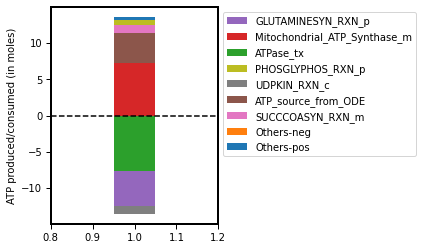

In [11]:
from sweetlovegroup.analysis import generateATPbudget
generateATPbudget(temp,sol.fluxes,day_or_night_tag="",outfile="temp.csv")

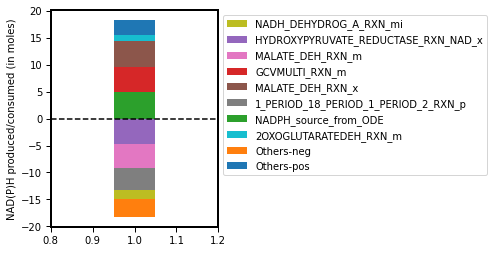

In [44]:
from sweetlovegroup.analysis import generateNADHNADPHbudget
generateNADHNADPHbudget(temp,sol.fluxes,day_or_night_tag="")

In [13]:
production ={"ATP synthesis":116.3282}
consumption={"Photosynthesis1":69.39382+37.0387,
             "Starch":1.33355,
             "Photorespiration":4.673108,
             "FBA":3.889}

In [14]:
sum(production.values())-sum(consumption.values())

2.1999999987087904e-05

In [15]:
69.39382+37.0387

106.43252000000001

In [16]:
met=temp.metabolites.get_by_id("CARBON_DIOXIDE_p")
for rxn in met.reactions:
    if round(rxn.flux,3)!=0:
        print(rxn.id+"\t"+str(rxn.flux*rxn.metabolites[met]))
        #print(rxn.reaction)

ACETOOHBUTSYN_RXN_p	0.0021765117402227623
CARBOXYCYCLOHEXADIENYL_DEHYDRATASE_RXN_p	0.007123129161317096
IGPSYN_RXN_p	0.0005229280845492557
CARBAMATE_KINASE_RXN_p	-0.0005229280845492557
CO2_pc	-0.024294958173154732
PYRUVDEH_RXN_p	0.0030951691185358053
DIAMINOPIMDECARB_RXN_p	0.0027701058057865054
PREPHENATEDEHYDROG_RXN_p	0.0005229280845492554
RXN_7800_p	0.002572241033988636
ACETOLACTSYN_RXN_p	0.00603487322875467


In [17]:
met=temp.metabolites.get_by_id("Pi_m")
for rxn in met.reactions:
    if round(rxn.flux,3)!=0:
        print(rxn.id+"\t"+str(rxn.flux*rxn.metabolites[met]))
        #print(rxn.reaction+"\n")

Mitochondrial_ATP_Synthase_m	-7.401177455786219
Pi_PROTON_mc	8.119163246006778
SUCCCOASYN_RXN_m	-0.7179857902205601


In [18]:
for rxn in temp.reactions:
    if len(rxn.reactants)==0 or len(rxn.products)==0:
        if round(rxn.flux,2)!=0:
            print(rxn.id+"\t"+str(rxn.flux))

H_tx	13.889053694886682
H2O_tx	-3.314930809338774
CO2_tx	-7.259180952095128
O2_tx	2.485160067341818
Pi_tx	-5.030581999999982
NH4_tx	0.13679517219949938
unlProtHYPO_c	18.449088562660823
GAP_tx	5.0201
G3P_tx	0.010482
GLYCOLATE_tx	9.3462
GLYCERATE_tx	4.6731
MAL_v_accumulation	0.09234611777536343
CIT_v_accumulation	-0.07516117257812269


In [19]:
temp.reactions.Plastidial_ATP_Synthase_p.reaction

'2.4 ADP_p + 14.0 PROTON_l + 3.0 Pi_p + 0.6 aADP_p --> 2.7 ATP_p + 11.3 PROTON_p + 3.0 WATER_p + 0.3 aATP_p'

In [20]:
rxn = Reaction("ATP source from ODE")
rxn.add_metabolites({temp.metabolites.get_by_id("ADP_p"):-0.8,
                     temp.metabolites.get_by_id("aADP_p"):-0.2,
                     temp.metabolites.get_by_id("Pi_p"):-1,
                     temp.metabolites.get_by_id("PROTON_p"):-0.9,
                     temp.metabolites.get_by_id("ATP_p"):0.9,
                     temp.metabolites.get_by_id("aATP_p"):0.1,
                     temp.metabolites.get_by_id("WATER_p"):1})


In [21]:
rxn.check_mass_balance()

{'charge': 6.661338147750939e-16,
 'H': -8.881784197001252e-16,
 'O': 1.1102230246251565e-15,
 'P': 2.220446049250313e-16}

In [22]:
met=temp.metabolites.get_by_id("S_ADENOSYLMETHIONINE_c")
for rxn in met.reactions:
    print(rxn.id+"\t"+str(rxn.flux*rxn.metabolites[met]))
    print(rxn.reaction)

RXN_3422_c	-0.0
5_HYDROXY_FERULIC_ACID_c + S_ADENOSYLMETHIONINE_c --> ADENOSYL_HOMO_CYS_c + SINAPATE_c
RXN_1104_c	-0.0
CPD_676_c + S_ADENOSYLMETHIONINE_c --> ADENOSYL_HOMO_CYS_c + FERULIC_ACID_c + PROTON_c
2_PERIOD_1_PERIOD_1_PERIOD_103_RXN_c	-0.0
0.87 PHOSPHORYL_ETHANOLAMINE_c + S_ADENOSYLMETHIONINE_c + 0.13 aPHOSPHORYL_ETHANOLAMINE_c --> ADENOSYL_HOMO_CYS_c + 0.88 CPD_406_c + 0.01 PROTON_c + 0.12 aCPD_406_c
S_ADENMETSYN_RXN_c	0.0
0.65 ATP_c + MET_c + WATER_c + 0.35 aATP_c --> 0.65 PPI_c + 0.7 PROTON_c + 0.7 Pi_c + S_ADENOSYLMETHIONINE_c + 0.35 aPPI_c + 0.3 aPi_c
RXN_8873_c	-0.0
0.42 CPD_7616_c + 0.2 PROTON_c + S_ADENOSYLMETHIONINE_c + 0.58 aCPD_7616_c --> ADENOSYL_HOMO_CYS_c + 0.62 VANILLIN_c + 0.38 aVANILLIN_c
ACETOSYRINGONE_BIOSYNTHESIS_c	-0.0
0.88 5_HYDROXY_ACETOVANILLONE_c + S_ADENOSYLMETHIONINE_c + 0.12 a5_HYDROXY_ACETOVANILLONE_c --> 0.56 ACETOSYRINGONE_c + ADENOSYL_HOMO_CYS_c + 0.32 PROTON_c + 0.44 aACETOSYRINGONE_c
RXN_5643_c	-0.0
0.88 CPD_5441_c + S_ADENOSYLMETHIONINE_c + 0.

In [23]:
fout = open("TC_FBAfluxes_MATUREFig5A.csv","w")
for rxn in temp.reactions:
    fout.write(rxn.id+"\t"+rxn.reaction+"\t"+str(rxn.flux)+"\n")
fout.close()

In [45]:
import pandas as pd
df3 = pd.DataFrame(data={"Light intensity":[1000],
                        "Vc":[27.6917],
                        "Vo":[9.3459],
                        "VPGA":[0.010483],
                        "VT3P":[5.0202],
                        "Vstarch":[1.3205],
                        "Vt_glycerate":[4.673],
                        "Vt_glycolate":[9.3459]})

In [47]:
temp = cobra_model.copy()

PPFD = df3["Light intensity"][0]
#constrain maintenace
ATPase = (0.0049*1000) + 2.7851
temp.reactions.get_by_id("ATPase_tx").lower_bound = ATPase
temp.reactions.get_by_id("ATPase_tx").upper_bound = ATPase
temp.reactions.get_by_id("NADPHoxc_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxc_tx").upper_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxp_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxp_tx").upper_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxm_tx").lower_bound = ATPase/9
temp.reactions.get_by_id("NADPHoxm_tx").upper_bound = ATPase/9

#constraint TP flux
temp.reactions.get_by_id("GAP_tx").lower_bound = 0
temp.reactions.get_by_id("GAP_tx").upper_bound = 0
temp.reactions.get_by_id("G3P_tx").lower_bound = 0
temp.reactions.get_by_id("G3P_tx").upper_bound = 0

#constraint glycollate and glycerate fluxes flux
temp.reactions.get_by_id("GLYCOLATE_tx").lower_bound = 0
temp.reactions.get_by_id("GLYCOLATE_tx").upper_bound = 0
temp.reactions.get_by_id("GLYCERATE_tx").lower_bound = 0
temp.reactions.get_by_id("GLYCERATE_tx").upper_bound = 0

temp.reactions.get_by_id("2PGADEHYDRAT_RXN_p").lower_bound = 0
temp.reactions.get_by_id("2PGADEHYDRAT_RXN_p").upper_bound = 0

temp.reactions.get_by_id("G6P_Pi_pc").lower_bound=0
temp.reactions.get_by_id("G6P_Pi_pc").upper_bound=0

#temp.reactions.get_by_id("RXN_1827_p").lower_bound=0
#temp.reactions.get_by_id("RXN_1827_p").upper_bound=0
#temp.reactions.get_by_id("MALTODEXGLUCOSID_RXN_p").lower_bound=0
#temp.reactions.get_by_id("MALTODEXGLUCOSID_RXN_p").upper_bound=0

temp.metabolites.get_by_id("Starch_b").remove_from_model()
temp.reactions.get_by_id("Starch_biomass").lower_bound = df3["Vstarch"][0]
temp.reactions.get_by_id("Starch_biomass").upper_bound = df3["Vstarch"][0]

temp.reactions.get_by_id("MAL_v_accumulation").lower_bound = -0.71*df3["Vstarch"][0]
temp.reactions.get_by_id("MAL_v_accumulation").upper_bound = -0.71*df3["Vstarch"][0]

temp.reactions.get_by_id("CIT_v_accumulation").lower_bound = 0.56*df3["Vstarch"][0]
temp.reactions.get_by_id("CIT_v_accumulation").upper_bound = 0.56*df3["Vstarch"][0]

#for rxn in cobra_model.reactions:
#    if rxn.lower_bound == -1000:
#        rxn.lower_boudn = -3000
#    if rxn.upper_bound == 1000:
#        rxn.upper_bound = 3000

#check if model works
temp.solver="gurobi"
sol = flux_analysis.parsimonious.pfba(temp)
#sol.fluxes = dict()
# fin = open("./../Validations/Nighttime_flux_FACE164_552.csv")
# for line in fin:
#     lineparts = line.replace("/n","").split(",")
#     sol.fluxes[lineparts[0]]=float(lineparts[2])
#sol = custom_pFBA(temp)
#sol = temp.slim_optimize()
rxn =  temp.reactions.get_by_id("Phloem_output_tx")
met = temp.metabolites.sSUCROSE_b
print("Sucrose export rate ="+str(rxn.metabolites[met]*sol.fluxes[rxn.id]))

Read LP format model from file C:\Users\sanus\AppData\Local\Temp\tmpnudhexpy.lp
Reading time = 0.02 seconds
: 875 rows, 1818 columns, 9022 nonzeros
Sucrose export rate =-0.3445285448712463


In [53]:
met = temp.metabolites.get_by_id("CARBON_DIOXIDE_r")
for rxn in met.reactions:
    if rxn.id in sol.fluxes.keys():
        if round(sol.fluxes[rxn.id],5)!=0:
            print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*rxn.metabolites[met]))
            print(rxn.reaction)

ALLANTOATE_DEIMINASE_RXN_r	0.031493208588283784
ALLANTOATE_r + 1.72 PROTON_r + WATER_r --> AMMONIUM_r + CARBON_DIOXIDE_r + 0.72 CPD0_2298_r + 0.28 aCPD0_2298_r
CO2_rc	-0.06298641717656757
CARBON_DIOXIDE_r <=> CARBON_DIOXIDE_c
UREIDOGLYCOLATE_HYDROLASE_RXN_r	0.031493208588283784
CPD_1091_r + 2 PROTON_r + WATER_r --> 2 AMMONIUM_r + CARBON_DIOXIDE_r + GLYOX_r


In [49]:
TCA = 0.9877777777777779-0.9421729825563122
AA = 0.002642058628190138+0.006559593847405237+0.005557433594800917+0.002550953182049924+0.00048155744032731316+0.00236874217474884+0.00048155744032731326
PPP = 0.5946080632622939+0.5098388534552903
TCA

0.045604795221465655

In [92]:
met1 = temp.metabolites.get_by_id("ATP_m")
met2 = temp.metabolites.get_by_id("aATP_m")
for rxn in met1.reactions:
    if round(sol.fluxes[rxn.id],5)!=0:
        print(rxn.id+"\t"+str(sol.fluxes[rxn.id]*(rxn.metabolites[met1]+rxn.metabolites[met2])))
        print(rxn.reaction)

Mitochondrial_ATP_Synthase_m	8.256218717982541
2.4 ADP_m + 10.0 PROTON_i + 3.0 Pi_m + 0.6 aADP_m --> 2.7 ATP_m + 7.3 PROTON_m + 3.0 WATER_m + 0.3 aATP_m
ADENYL_KIN_RXN_m	-0.0011014271289407536
AMP_m + 0.9 ATP_m + 0.3 PROTON_m + 0.1 aATP_m <=> 1.6 ADP_m + 0.4 aADP_m
ATP_ADP_mc	-8.400497415613689
0.5 ADP_c + 0.9 ATP_m + 0.1 PROTON_m + 0.5 aADP_c + 0.1 aATP_m <=> 0.8 ADP_m + 0.65 ATP_c + 0.15 PROTON_c + 0.2 aADP_m + 0.35 aATP_c
ATP_AMP_mc	-0.0011014271289407536
AMP_c + 0.9 ATP_m + 0.35 PROTON_c + 0.1 aATP_m <=> AMP_m + 0.65 ATP_c + 0.1 PROTON_m + 0.35 aATP_c
SUCCCOASYN_RXN_m	0.1464815518890304
0.8 ADP_m + Pi_m + SUC_COA_m + 0.2 aADP_m --> 0.9 ATP_m + CO_A_m + 0.1 PROTON_m + SUC_m + 0.1 aATP_m


In [48]:
fout = open("TC_MATUREfluxes_night.csv","w")
for rxn in temp.reactions:
    fout.write(rxn.id+"\t"+rxn.reaction+"\t"+str(sol.fluxes[rxn.id])+"\n")
fout.close()

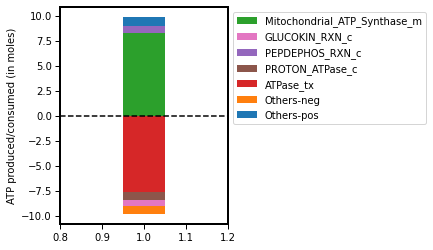

In [15]:
from sweetlovegroup.analysis import generateATPbudget
generateATPbudget(temp,sol.fluxes,day_or_night_tag="",outfile="temp.csv")

In [78]:
rxnlist =list()
for rxn in temp.metabolites.STARCH_p.reactions:
    rxnlist.append(rxn)
    
from cobra.flux_analysis import flux_variability_analysis
fva_result = flux_variability_analysis(temp, reaction_list=rxnlist)

KeyboardInterrupt: 

In [ ]:
fva_result